In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


## Machine Learning Project by 21f3002445

**Step in ML Projects**
1. **look at the data for big picture.**
2. **UnderStand the data and gain insight from data through Explotery data analysis and plot.**
3. **Data Clening and Preprocessing**
4. **Select the useful features for Build the Machine learning Model.**
5. **Select a model to train it**
6. **Hypertune the model to get best results.**
7. **Present the Model accuarcy for diffrent diffrent algorithm**

## Get the data
with help of pandas data frame we are acess the train and test data.

In [2]:
## access the train data
df_train = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
print('Train data information:')
print(df_train.info())
        
## acess the test data
df_test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
print('----------------------------------------------------------------------------------------')
print('test data information')
print(df_test.info())

Train data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB
None
------------

**Check the missing value for train ans test data**

In [3]:
df_train.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [4]:
df_test.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

## Data Cleaning 

**Here We got Two missing values for Recipe Review in train data and zero in test data**

In [5]:
df_train['Recipe_Review'].unique()

array(['great recipe! I have made them just as written, wonderfull, moist, delicate flavor...then the next time, I did not have sour cream so used vanilla yogurt and added toffee pieces- still good.  I have made them as cupcakes and they rise very nicely and stay moist.',
       'This is an easy and quick recipe that is great for the fall cool weather. I only made substitutions for things I did not have on hand such as making my own ranch dressing mix, replacing stewed tomatoes with diced tomatoes with onion powder, and using chili hot beans instead of the drained pinto beans and can of green chilies. If I had all of the ingredients on hand, I wouldn&#39;t have changed anything.',
       'I think I was looking for something extra special in this soup, but it wasn&#39;t there--quite a bit of work for something that tasted merely average.',
       ...,
       'I made this pie for my family and they loved it.  I froze the other half and then made it for a work potluck and everyone wanted 

In [6]:
# drop the missing value with function of dropna. and store in same dataframe by doing inplace=True
df_train.dropna(inplace=True)

## Explonatry Data analysis for train data
**Importing Required Libraries**

In [7]:
## importing visualization api
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
print('Train data shape:',df_train.shape)
print('Test data shae:',df_test.shape)     ## one column is less due to missing of target feaures in test.
df_train.describe().T

Train data shape: (13634, 15)
Test data shae: (4546, 14)


,count,mean,std,min,25%,50%,75%,max
ID,13634.0,1.210559e+02,1.169787e+02,0.000000e+00,4.500000e+01,9.100000e+01,1.480000e+02,7.240000e+02
RecipeNumber,13634.0,3.862938e+01,2.967164e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.300000e+01,1.000000e+02
RecipeCode,13634.0,2.178741e+04,2.388439e+04,3.860000e+02,6.504000e+03,1.460000e+04,3.312100e+04,1.917750e+05
UserReputation,13634.0,2.160481e+00,1.008715e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+02
CreationTimestamp,13634.0,1.623714e+09,5.444406e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
ReplyCount,13634.0,1.452252e-02,1.373334e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
ThumbsUpCount,13634.0,1.098430e+00,4.166771e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01
ThumbsDownCount,13634.0,5.437876e-01,3.265893e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
Rating,13634.0,4.288617e+00,1.544928e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
BestScore,13634.0,1.531357e+02,1.409958e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


**Count of unique food items supplied in recipe**

In [9]:
df_train['RecipeNumber'].unique().shape

(100,)

Recipe code is unique number for every Recipe.

In [10]:
print(df_train['RecipeCode'].unique().shape)
print(df_train['RecipeCode'][:5])

(100,)
0     12259
1      8202
2      2832
3    100276
4     19731
Name: RecipeCode, dtype: int64


In [11]:
print('unique number of food recipe:',df_train['RecipeName'].unique().shape)
print('check the name of food recipe:\n',df_train['RecipeName'][:5])

unique number of food recipe: (100,)
check the name of food recipe:
 0    Banana Bars with Cream Cheese Frosting
1                          Simple Taco Soup
2                         Cheeseburger Soup
3                 Grilled Huli Huli Chicken
4                          Cauliflower Soup
Name: RecipeName, dtype: object


In [12]:
df_train.loc[df_train['RecipeName']=='Banana Bars with Cream Cheese Frosting'].head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
172,4,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_432323,u_1tOHuoHsIKxNgRRS2s1MxNt9jg6,GoldApple,0,1622648873,0,2,2,5,167,Just made these banana bars for Easter. They w...
617,124,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_318162,u_1oKVvQbJjVuvKHTFaOOplRwvy5F,jillgingras,1,1622717934,0,0,0,0,100,This is the best banana bar recipe. It is a fa...
720,37,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_292137,u_1oKVZkwou43a0PL7Aw0NCrDXTLL,Debglass11,30,1622717807,0,0,0,5,100,These are wonderful! Made exactly as written....
796,73,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_373766,u_1oKVeUN8Xkh7FxowgzAvZdnEl7Y,oeg1kallee,1,1622718153,0,0,0,5,100,wow- I have a new go-to recipe for my ripe ban...


**Here we can identify the recipe name through Recipe code or recipe number.these three feature are corelated each other.so dropped two feature preocessed with RecipeName**

**checking the Other Categorical Features for gain the userful insight from data**

In [13]:
print(df_train['CommentID'][:5])       # first five comment in train data sets
print('------------------------------------')   
print(df_train['UserID'][:5])                 # first five username in train data sets
print('-------------------------------------')
print(df_train['UserName'][:5])               # first five username in train data sets

0     sp_aUSaElGf_12259_c_149978
1      sp_aUSaElGf_8202_c_310332
2      sp_aUSaElGf_2832_c_206522
3    sp_aUSaElGf_100276_c_434088
4     sp_aUSaElGf_19731_c_387011
Name: CommentID, dtype: object
------------------------------------
0    u_1oKVaBmiEKwAFyiHrDLoWpbel0J
1    u_1oKZeRIXYzGNhGW8OMR3O4lX1ih
2    u_1oKYHUtdaD48KJCDYq5wfpAUxWz
3    u_1oKZCQcKQZdQhDVBS7oISc216VA
4    u_1oKd4sudZQPgu6YALiC7bW7mKMs
Name: UserID, dtype: object
-------------------------------------
0     misscoffeepot
1    MichelleMalone
2         jeannem32
3             ds422
4       SusanHoward
Name: UserName, dtype: object


In [14]:
df_train.loc[df_train['UserID']=='u_1oKVaBmiEKwAFyiHrDLoWpbel0J']['UserName']

0        misscoffeepot
4188     misscoffeepot
5132     misscoffeepot
5329     misscoffeepot
8081     misscoffeepot
12803    misscoffeepot
Name: UserName, dtype: object

**Here commentid has alphanumric character.they are not gives any insight.but with userid or username we can find each other.so i dropeed UserID and proceed with UserName**

**Top Five Food recipe according to rating average**

In [15]:
df_train.groupby(['RecipeName'])['Rating'].mean().sort_values(ascending=False)[:5]

RecipeName
Rustic Italian Tortellini Soup    4.739336
Corn Pudding                      4.692308
Zucchini Pizza Casserole          4.657371
Comforting Chicken Noodle Soup    4.654321
Special Banana Nut Bread          4.648936
Name: Rating, dtype: float64

## Feature Engineering

In [16]:
df_train['CreationTimestamp']= pd.to_datetime(df_train['CreationTimestamp'],unit='s')

## Visualization of Features Using Heatmap

<Axes: >

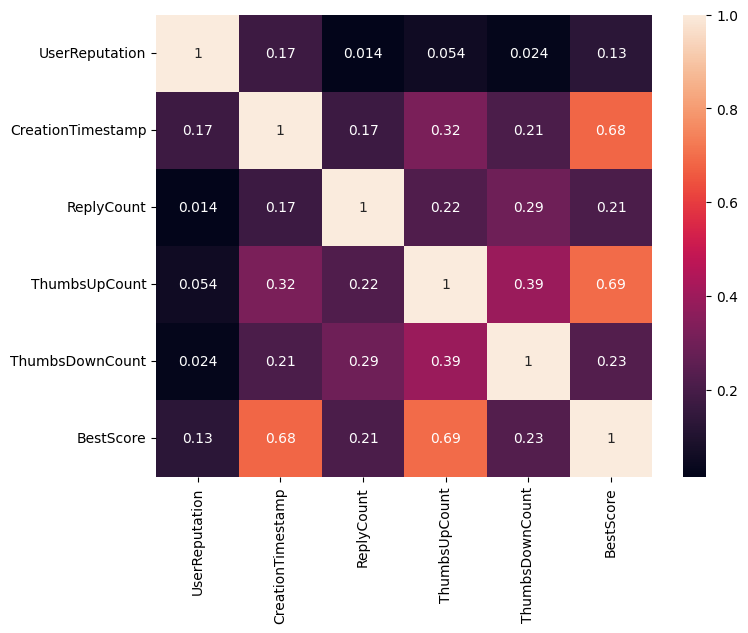

In [17]:
corr = df_train[['UserReputation', 'CreationTimestamp', 'ReplyCount','ThumbsUpCount', 'ThumbsDownCount',  'BestScore']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)

**An analysis of the correlation matrix via heatmap reveals that best score much related with creationtime stumps and thumbsUpCount. exhibit high correlation with the Best score. Consequently, I've opted to exclude this column**

Effect on Rating with remaing numrical features

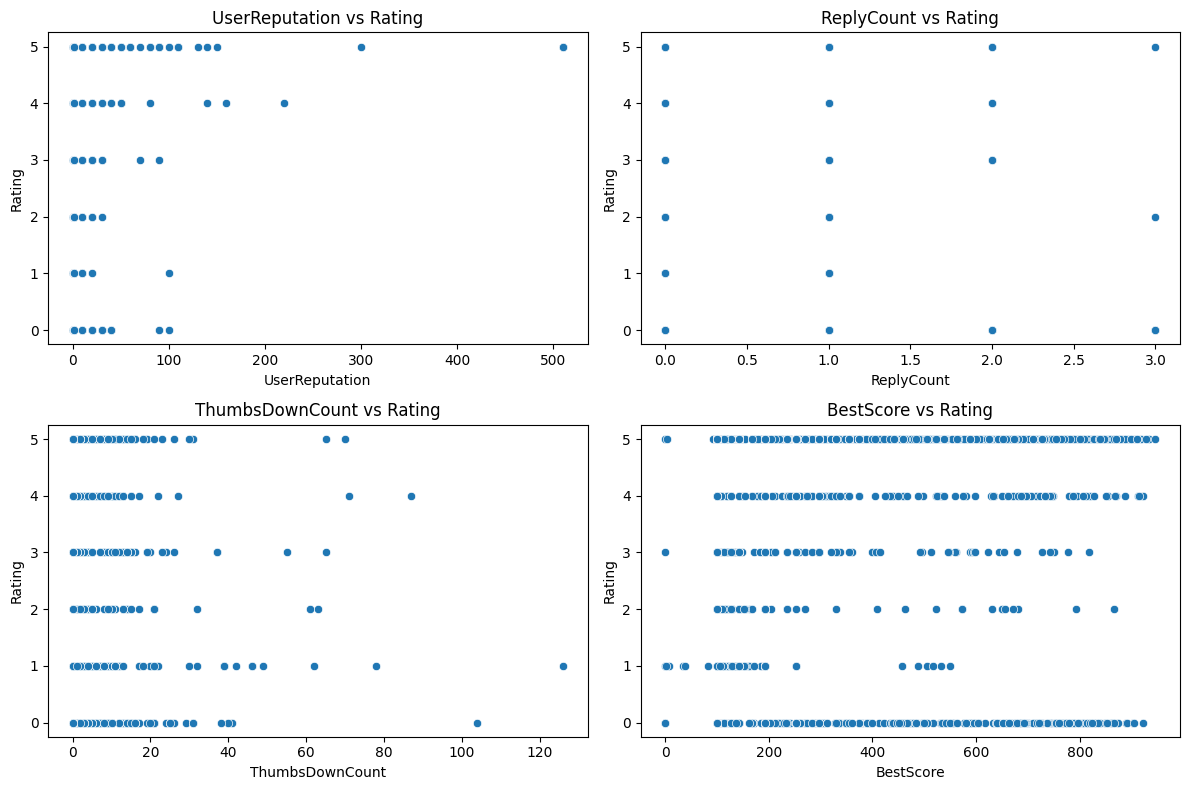

In [18]:
numric_c = ['UserReputation', 'ReplyCount', 'ThumbsDownCount', 'BestScore']
num_rows = len(numric_c) // 2
num_cols = 2
# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes if necessary
axes = axes.flatten()

# Plot each numeric column against 'Rating'
for i, c in enumerate(numric_c):
    sns.scatterplot(x=c, y='Rating', data=df_train, ax=axes[i])
    axes[i].set_title(f'{c} vs Rating')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Rating')

# Adjust layout
plt.tight_layout()
plt.show()



We can clearly see these features not much affect the rating.so i have dropeed these. and proceed with only categorical features.

**Visualization of all Rating on histogram plot**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


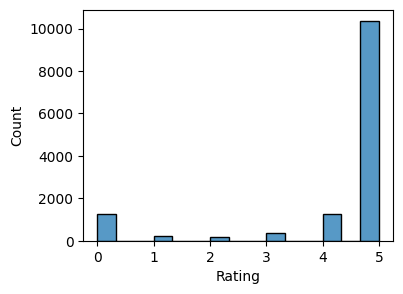

In [19]:
plt.figure(figsize=(4,3))
sns.histplot(df_train['Rating'])
plt.show()

In [20]:
df_train['Rating'].value_counts()

Rating
5    10369
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

**Here we cleary the rating histogram plot.and conclude that data is imbalced.before building the model first we need to balance the that through using SMOTE or RandomSampler i have tried with balancing the  data but it did not give good accuracy results.**

## Data Preprocessing.
**Import all the required api for Preprocessing from scikit learn.**

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# transforming the data through this api
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,MaxAbsScaler,PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit, cross_validate

from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.impute import SimpleImputer


**Removing features from both the test and train datasets that demonstrate weak correlations with the labels rating, as indicated by heatmap analysis and exploratory data exploration (EDA).**

In [22]:
#drop the all the features in train data has low correletion with ratings
df_train.drop(['ID', 'RecipeNumber', 'RecipeCode', 'CommentID', 'UserID','UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore'],inplace=True,axis=1)

#drop the all the features in test data has low correletion with ratings
df_test.drop(['ID', 'RecipeNumber', 'RecipeCode', 'CommentID', 'UserID','UserReputation', 'CreationTimestamp', 'ReplyCount',
       'ThumbsUpCount', 'ThumbsDownCount', 'BestScore'],inplace=True,axis=1)

print(df_train.columns)   #in the train data we got rating as target variable
print(df_test.columns)

Index(['RecipeName', 'UserName', 'Rating', 'Recipe_Review'], dtype='object')
Index(['RecipeName', 'UserName', 'Recipe_Review'], dtype='object')


In [23]:
df_train.shape,df_test.shape

((13634, 4), (4546, 3))

**Excluding the target variable from the training data to proceed with further data transformation steps.**

In [24]:
X_train = df_train.drop(['Rating'],axis=1)
Y_train = df_train['Rating']
print(X_train.shape,Y_train.shape)

(13634, 3) (13634,)


## Feature Transformation 
**`Count Vectorization` for UserName and RecipeName, `TfidfVectorizer` for Recipe Review"**

**Count Vectorizer**
Convert a collection of text documents to a matrix of token counts.
This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

**TfidfVectorizer** 
Transform a count matrix to a normalized tf or tf-idf representation.

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

# Pipeline and Columntransformer

In [25]:
pipe1=Pipeline([("count_vec",CountVectorizer())])
pipe2 = Pipeline([("tfid_vec",TfidfVectorizer(min_df=5,ngram_range=(1,4), max_features=10000))])

trf = [("pipe1",pipe1,['UserName','RecipeName']),
      ("pipe2",pipe2,['Recipe_Review'])]

column_trf = ColumnTransformer(trf,remainder='drop',verbose_feature_names_out=False)

pipe_trf = Pipeline([("column_trf",column_trf)])
pipe_trf
# transform_data = pipe_trf.fit(X_train).set_output(transform="pandas")

Pipeline(steps=[('column_trf',
                 ColumnTransformer(transformers=[('pipe1',
                                                  Pipeline(steps=[('count_vec',
                                                                   CountVectorizer())]),
                                                  ['UserName', 'RecipeName']),
                                                 ('pipe2',
                                                  Pipeline(steps=[('tfid_vec',
                                                                   TfidfVectorizer(max_features=10000,
                                                                                   min_df=5,
                                                                                   ngram_range=(1,
                                                                                                4)))]),
                                                  ['Recipe_Review'])],
                                   verbose_feature_names_out=False))])

In [26]:
#intializing the count vectorizer Obejct 
count_transform = CountVectorizer()

##count Vectorizer transformation for UserName and Recipe name in train and test data
username_vect = count_transform.fit(X_train['UserName'].values) 

# applying Learned parameter to tranform the features.
x_train_username = username_vect.transform(X_train['UserName'].values)   
df_test_username = username_vect.transform(df_test['UserName'].values)

recipename_vect = count_transform.fit(X_train['RecipeName'].values)    

x_train_recipename = recipename_vect.transform(X_train['RecipeName'].values)
df_test_recipename = recipename_vect.transform(df_test['RecipeName'].values)

#intializing the Tfidf vectorizer Obejct 
tfid = TfidfVectorizer(min_df=5,ngram_range=(1,4), max_features=10000)

tfid.fit(X_train['Recipe_Review'].values)

X_train_text = tfid.transform(X_train['Recipe_Review'].values)
df_test_text = tfid.transform(df_test['Recipe_Review'].values)


## Now we here combining all the three transform features into scipy.sparse._csr.csr_matrix format.

In [27]:
from scipy.sparse import hstack

X_train_transform = hstack((x_train_username, x_train_recipename, X_train_text))
df_test_transform = hstack((df_test_username, df_test_recipename, df_test_text))

In [28]:
X_train_transform.shape,df_test_transform.shape

((13634, 21038), (4546, 21038))

## Spliting the train data into x_train,x_test,y_train ,y_test using train-test methods.

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X_train_transform,Y_train,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)

(10907, 21038) (2727, 21038)


## Model Building and training .
Here first imported all the applied best model and metrics liabray

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

#evaluation metric
from sklearn.metrics import hinge_loss,log_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve,precision_score,recall_score,classification_report,accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict,GridSearchCV


In [31]:
# xgb_clf.score(x_train,y_train)

## 1. Logistic Regression without HPT

**LogisticRegression is a machine learning model used for binary and multiclass classifications tasks. It's a type of regression model that is used to estimate the probability that an instance belongs to a particular class. Despite its name, LogisticRegression is actually a classification algorithm, not a regression algorithm.  
in python it is imported from Sklearn.linear_model api**

**First i have tried with LogisticRegession without Hpt.it is just cross the cutoff by scoring `77.8`**

In [32]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline([("log_reg",LogisticRegression(max_iter=1500))])

lr.fit(x_train, y_train)

Pipeline(steps=[('log_reg', LogisticRegression(max_iter=1500))])

In [33]:
ypred_test = lr.predict(x_test)
ypred_train = lr.predict(x_train)
y_final_pred = lr.predict(df_test_transform)

accuarcy_lr_clf = accuracy_score(y_test,ypred_test)
print('Accuarcy Score on Validation data for LogisticRegression :',accuarcy_lr_clf)

Accuarcy Score on Validation data for LogisticRegression : 0.7854785478547854


**Lets see the classification report for LogisticRegression Model**

In [34]:
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.57      0.18      0.27       238
           1       0.50      0.02      0.05        41
           2       0.25      0.03      0.05        40
           3       0.56      0.12      0.19        78
           4       0.43      0.12      0.18       248
           5       0.80      0.99      0.89      2082

    accuracy                           0.79      2727
   macro avg       0.52      0.24      0.27      2727
weighted avg       0.73      0.79      0.72      2727



Confustion Matrix

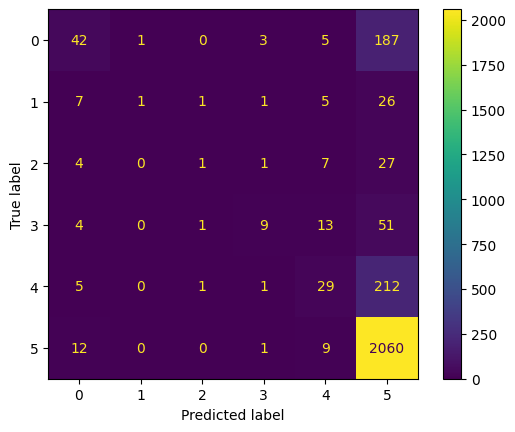

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test,ypred_test)
plt.show()

## Tuning the Hyper parameter of LogisticRegression with GridSearchCV
**thorugh the Hyperparameter tuning we got  highest accuarcy score aroung `78.94`**

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'log_reg__solver': ['liblinear', 'saga']
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('log_reg',
                                        LogisticRegression(max_iter=1500))]),
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'log_reg__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [37]:
grid_search.best_estimator_

Pipeline(steps=[('log_reg',
                 LogisticRegression(C=10, max_iter=1500, solver='liblinear'))])

In [38]:
ypred__test = grid_search.best_estimator_.predict(x_test)
ypred___train = grid_search.best_estimator_.predict(x_train)
y_final___pred = grid_search.best_estimator_.predict(df_test_transform)

accuracy_lr_HPT = accuracy_score(y_test,ypred__test)
print('The accuracy score on the validation dataset for logistic regression with hpt: ',accuracy_lr_HPT)

The accuracy score on the validation dataset for logistic regression with hpt:  0.7902456912357902


In [39]:
print(classification_report(y_test,ypred__test))

              precision    recall  f1-score   support

           0       0.56      0.23      0.33       238
           1       0.56      0.12      0.20        41
           2       0.29      0.05      0.09        40
           3       0.43      0.13      0.20        78
           4       0.42      0.18      0.25       248
           5       0.82      0.98      0.89      2082

    accuracy                           0.79      2727
   macro avg       0.51      0.28      0.33      2727
weighted avg       0.74      0.79      0.74      2727



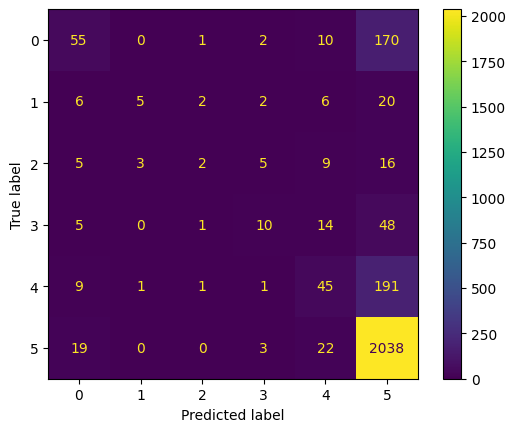

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test,ypred__test)
plt.show()

In [41]:
submission = pd.DataFrame({"ID": range(1,4547), 
                           "total_amount": y_final___pred}) 

submission.to_csv('submission.csv',index=False)

## 2. Linear SVM  algorithm

**it gives accuracy score `78.54` without hpt**

In [42]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(max_iter=1500)
lin_svc.fit(x_train,y_train)

LinearSVC(max_iter=1500)

In [43]:
ypred_test = lin_svc.predict(x_test)
ypred_train = lin_svc.predict(x_train)
y_final_pred = lin_svc.predict(df_test_transform)

accuracy_linsvc = accuracy_score(y_test,ypred_test)
print('Accuarcy Score on validation data for Linear SVM model: ',accuracy_linsvc)

Accuarcy Score on validation data for Linear SVM model:  0.7851118445177852


## Linear SVC Tuning the HyperParameter
**it is also give same result not increase to much accuracy score 78.76**
1. this algorithm is second best performer

In [44]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C':[0.001,0.01,0.1,1,10],
           'loss':['hinge','squared_hinge'],
            'tol': [1e-4, 1e-3, 1e-2]
           }

gscv_svm = GridSearchCV(lin_svc,param_grid=param_dist,
                        cv=5,scoring='accuracy')
gscv_svm.fit(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=1500),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'squared_hinge'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [45]:
gscv_svm.best_estimator_

LinearSVC(C=1, loss='hinge', max_iter=1500)

In [46]:
ypred_test = gscv_svm.best_estimator_.predict(x_test)
ypred_train = gscv_svm.best_estimator_.predict(x_train)
y_final_pred = gscv_svm.best_estimator_.predict(df_test_transform)

accuracy_linsvc_hpt = accuracy_score(y_test,ypred_test)
print('Accuracy Score on validation data for linear SVM with hpt: ',accuracy_linsvc_hpt)

Accuracy Score on validation data for linear SVM with hpt:  0.7876787678767877


## 3. Perceptron algorithm 

**this algorithm gives accuracy around 77.6**

In [47]:
from sklearn.linear_model import Perceptron
pp_clf = Perceptron()
pp_clf.fit(x_train,y_train)

Perceptron()

In [48]:
ypred_test = pp_clf.predict(x_test)
ypred_train = pp_clf.predict(x_train)
y_final_pred = pp_clf.predict(df_test_transform)

accuracy_perceptron = accuracy_score(y_test,ypred_test)
print('Accuarcy score of Perceptron algorithm on validation data:{0:}',accuracy_perceptron)

Accuarcy score of Perceptron algorithm on validation data:{0:} 0.7711771177117712


**Tuning the HPT of Percpetron**

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Create the Perceptron classifier
pp_clf = Perceptron()

gscv_pp = GridSearchCV(pp_clf, param_grid, cv=5, scoring='accuracy')
gscv_pp.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'max_iter': [100, 500, 1000],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy')

In [50]:
gscv_pp.best_estimator_

Perceptron(max_iter=100, tol=1e-05)

In [51]:
ypred_test = gscv_pp.best_estimator_.predict(x_test)
ypred_train = gscv_pp.best_estimator_.predict(x_train)
y_final_pred = gscv_pp.best_estimator_.predict(df_test_transform)

accuracy_perceptron_hpt = accuracy_score(y_test,ypred_test)
print('accuracy Score of Perceptron algortihm with hpt on validation data :',accuracy_perceptron_hpt)

accuracy Score of Perceptron algortihm with hpt on validation data : 0.77007700770077


## 4. RandomForestClassifier

The RandomForestClassifier is a popular ensemble learning method used for classification tasks.

This approach improves robustness and reduces overfitting compared to individual decision trees. RandomForestClassifier is known for its effectiveness across various datasets and problem domains."

it is implemented by `sklearn.ensemble api`.

**this algorithm gives only accuarcy of 77.012**

In [52]:
from sklearn.ensemble import RandomForestClassifier

randomf_clf = RandomForestClassifier()
randomf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
ypred_test = randomf_clf.predict(x_test)
ypred_train = randomf_clf.predict(x_train)
y_final_pred = randomf_clf.predict(df_test_transform)

accuracy_randomF = accuracy_score(y_test,ypred_test)
print('Accuracy Score of random forest algorithm on validation data: ',accuracy_randomF)

Accuracy Score of random forest algorithm on validation data:  0.7708104143747708


**tuning the hyperParameter of RandomForestClassifier**
**this algorithm gives only `76.088`**

In [54]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],                  
    'max_depth': [10, 20],                      
    'min_samples_leaf': [1, 2, 4],           
    'max_features': ['auto', 'sqrt', 'log2']       
}

# Instantiate the RandomForestClassifier
randomf_clf = RandomForestClassifier()

# Instantiate GridSearchCV
gscv_randomf= GridSearchCV(randomf_clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
gscv_randomf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [55]:
gscv_randomf.best_estimator_

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=50)

In [56]:
ypred = gscv_randomf.best_estimator_.predict(x_test)
ypred_train = gscv_randomf.best_estimator_.predict(x_train)
y_final_pred = gscv_randomf.best_estimator_.predict(df_test_transform)

accuracy_randomF_hpt = accuracy_score(y_test,ypred_test)
print('Accuarcy Score of Random forest algorithm with hpt on validation data: ',accuracy_randomF_hpt)

Accuarcy Score of Random forest algorithm with hpt on validation data:  0.7708104143747708


# XGB Classifier.

In [57]:
from xgboost import XGBClassifier

# Create XGBoost classifier
xgb_clf = XGBClassifier()

# Fit the classifier to the training data
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [58]:
xgb=xgb_clf.score(x_test,y_test)
xgb

0.7807114044737807

# HPT OF XGB Classifier

In [59]:
# param_grid = {
#     'max_depth': [10, 50, 100],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.8, 1.0],           # Fraction of samples to be used for training each tree
#     'colsample_bytree': [0.8, 1.0],      # Fraction of features to be used for training each tree
#     'reg_alpha': [0, 0.1, 0.5],           # L1 regularization term on weights
#     'reg_lambda': [0, 0.1, 0.5],      # L2 regularization term on weights
# }

# # Create XGBoost classifier
# xgb_clf = XGBClassifier()

# # Perform GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

## Model Comparision on accuracy_score for Validation data and test data

In [60]:
A = round(accuracy_randomF, 2)
B = round(accuracy_perceptron_hpt, 2)
C = round(accuracy_linsvc, 2)
D = round(accuracy_linsvc_hpt, 2)
E = round(accuarcy_lr_clf, 2)
F = round(accuracy_lr_HPT, 2)
G = round(xgb,2)

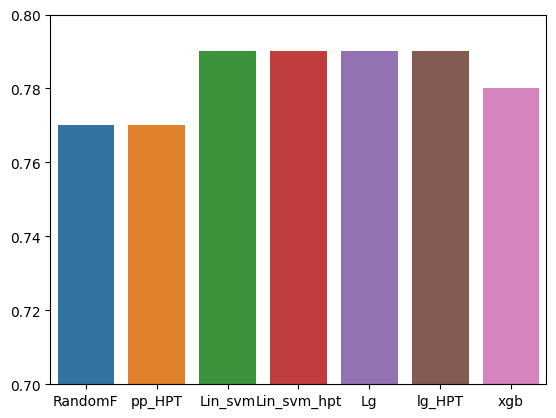

In [61]:
model_name = ['RandomF','pp_HPT','Lin_svm','Lin_svm_hpt','Lg','lg_HPT','xgb']
accuracy_score = [A,B,C,D,E,F,G]

# plt.figure(figsize=(8,6))
sns.barplot(x=model_name,y=accuracy_score)
plt.ylim(0.7, 0.8)
plt.show()


Compare the model on the final accuarcy rate

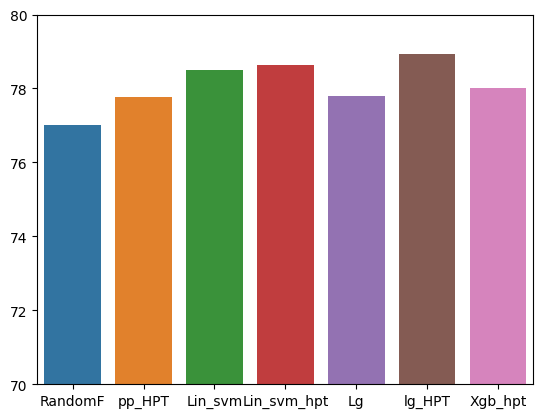

In [62]:
sns.barplot(x=['RandomF', 'pp_HPT', 'Lin_svm', 'Lin_svm_hpt', 'Lg', 'lg_HPT','Xgb_hpt'], y=[77.012, 77.76, 78.5, 78.64, 77.8, 78.94,78.02])
plt.ylim(70, 80)  # Set the y-axis range from 70 to 80
plt.show()